In [1]:
import numpy as np
import scipy.io as sio
import os,sys
import torch
import matplotlib.pyplot as plt
import torch.fft as F
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import h5py
from importlib import reload
from torch.nn.functional import relu
import torch.nn as nn
import torch.nn.functional as Func
import torch.optim as optim
import utils,mnet
import logging

In [2]:
reload(utils)
from utils import mask_naiveRand,mask_prob,kplot
reload(mnet)
from mnet import MNet

# CNN for mask


### load data and train-test-split

In [18]:
data_path = '/home/huangz78/data/'
# data = np.load(data_path+'datafornn.npz')
data = np.load(data_path+'testdata.npz')
print(data.files)

imgs = data['ifftimgs']
labels = data['labels']
yimgs = data['sub_y']

['ifftimgs', 'labels', 'sub_y']


In [19]:
print('imgs   shape :', imgs.shape)
print('labels shape :', labels.shape)
print('yimgs  shape :', yimgs.shape)

imgs   shape : (40, 320, 320)
labels shape : (40, 224)
yimgs  shape : (40, 96, 320, 2)


In [14]:
# train-test split
train_ratio = .8
trainInds = np.random.choice(199,size=int(199*train_ratio),replace=False)
testInds  = np.setdiff1d(np.arange(199),trainInds)

In [15]:
trainfile = '/home/huangz78/data/traindata.npz'
np.savez(trainfile,ifftimgs=imgs[trainInds,:,:],labels=labels[trainInds,:],sub_y=yimgs[trainInds,:,:,:])

testfile = '/home/huangz78/data/testdata.npz'
np.savez(testfile,ifftimgs=imgs[testInds,:,:],labels=labels[testInds,:],sub_y=yimgs[testInds,:,:,:])

## play with trained model

In [12]:
## load existing model
net = MNet()
optimizer = optim.RMSprop(net.parameters(), lr=.01, weight_decay=1e-8, momentum=0.9)
checkpoint_path = '/home/huangz78/mri/checkpoints/mnet.pth'
checkpoint = torch.load(checkpoint_path)
net.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch_init = checkpoint['epoch']
print(f'Model loaded from {checkpoint_path}')

Model loaded from /home/huangz78/mri/checkpoints/mnet.pth


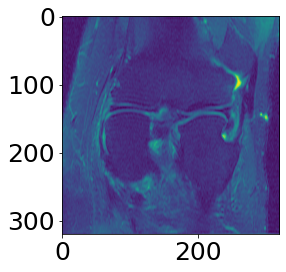

In [56]:
img = subimgs[:,:,135]
plt.figure()
plt.imshow(img)
plt.show()

img = torch.tensor(img,dtype=torch.float).view(1,1,320,320)
mask_learnt = net(img)

In [ ]:
trainMNet(imgs,labels,epochs=30,batchsize=10,train_ratio=.8,\
              net=None,lr=0.01,save_cp=True)

epoch 1 batch 5: train batch loss 1932653.5 
	 epoch 1 batch 5: test loss 11.84375 
epoch 1 batch 10: train batch loss 314637.15625 
	 epoch 1 batch 10: test loss 56.4140625 
epoch 1 batch 15: train batch loss 135917.734375 
	 epoch 1 batch 15: test loss 10.5859375 
	 epoch 1 end: test loss 11.4765625 
Checkpoint 1 saved !
epoch 2 batch 5: train batch loss 86343.7265625 
	 epoch 2 batch 5: test loss 11.9453125 
epoch 2 batch 10: train batch loss 41777.171875 
	 epoch 2 batch 10: test loss 14.0546875 
epoch 2 batch 15: train batch loss 60340.86328125 
	 epoch 2 batch 15: test loss 15.1640625 
	 epoch 2 end: test loss 24.453125 
Checkpoint 2 saved !
epoch 3 batch 5: train batch loss 82945.96875 
	 epoch 3 batch 5: test loss 14.5 


In [12]:
reload(utils)
from utils import MNet,mask_naiveRand